## Effect of Covid -19 on Startups

To analyze the effect of covid-19 on startups we will be looking Ministry of Corporate Affair's official data (https://www.mca.gov.in/MinistryV2/monthlyinformationbulletin.html) 

In this Analysis we will use data from Month January 2020 to March 2021

### Description of Data
| Column Name      | Description |
| ----------- | ----------- |
| Year      | 2020 - 2021       |
| Month   | From Jan to Dec in 2020 and Jan to Mar in 2021        |
| Total_registered   | Total no of business registered at the end of every month        |
| closed   | No of companies closed in that perticular month        |
| dormant   | No of Companies Inactive or slowed down in that perticular month        |
| liquidation   | No of companies liquidated by Govt.        |
| Struck_off   | No of companies De-registered from the MCA        |

### Tasks to Complete this project
-     **Task1 : Getting new Registered Companies of each month**
-     **Task2 : Checking the Trend of new Registered Companies in year 2020**
-     **Task3 : Getting Total Closed Companies each month**
-     **Task4 : Checking the Trend of Total Closed Companies in year2020**


### Necessary Imports

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Reading mcaData Csv file into project

In [5]:
mcaData = pd.read_csv('mcaData.csv')

mcaData.head()

,year,month,total_registered,closed,dormant,liquidation,struck_off,active
0,2020,1,1979469,742819,2147,6516,41458,1186529
1,2020,2,1989777,744014,2170,6574,41974,1195045
2,2020,3,1995953,745426,2185,6637,42062,1199643
3,2020,4,1999190,745723,2213,6652,43325,1201277
4,2020,5,2004040,745979,2245,6668,43504,1205644


### Task 1 : Getting new Registered Companies of each month
to perform this task we will iterate data frame and by **subtracting last month's total_registered from current month.**

In [21]:
newRegistered = []

total = 1979469

for index,row in mcaData.iterrows():
    
    newRegistered.append(int(row['total_registered'] - total))
    total = row['total_registered']
    
mcaData['newRegistered'] = newRegistered

mcaData.head()

,year,month,total_registered,closed,dormant,liquidation,struck_off,active,newRegistered
0,2020,1,1979469,742819,2147,6516,41458,1186529,0
1,2020,2,1989777,744014,2170,6574,41974,1195045,10308
2,2020,3,1995953,745426,2185,6637,42062,1199643,6176
3,2020,4,1999190,745723,2213,6652,43325,1201277,3237
4,2020,5,2004040,745979,2245,6668,43504,1205644,4850


### Task2 : Checking the Trend of new Registered Companies in year 2020
to achieve this we will first seperate year 2020 data from complete data and removing january month as we assumed newRegistered in January month as 0.

In [32]:
mca2020 = mcaData[(mcaData['year']==2020) & (mcaData['newRegistered']>0)]
mca2021 = mcaData[mcaData['year'] == 2021]


mca2020.head()

,year,month,total_registered,closed,dormant,liquidation,struck_off,active,newRegistered
1,2020,2,1989777,744014,2170,6574,41974,1195045,10308
2,2020,3,1995953,745426,2185,6637,42062,1199643,6176
3,2020,4,1999190,745723,2213,6652,43325,1201277,3237
4,2020,5,2004040,745979,2245,6668,43504,1205644,4850
5,2020,6,2014969,746278,2242,6706,43770,1215973,10929


### Plotting Bar Chart to visualize year 2020 data for new Registered companies each year.

by plotting this chart we can analyse that **covid 19 did affected the new businesses but only in intial months.**

Text(0, 0.5, 'New Registered Companies')

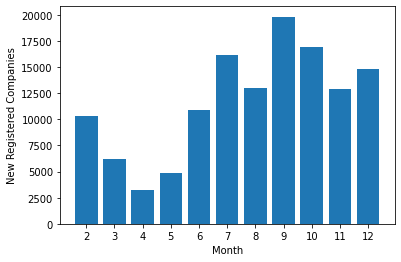

In [36]:
plt.bar(mca2020['month'],mca2020['newRegistered'])
plt.xticks(mca2020['month'])
plt.xlabel('Month')
plt.ylabel('New Registered Companies')

### Task3 : Getting Total Closed Companies each month
To achieve this we will sum-up columns like **closed, dormant, liquidation, struck_off** 

In [45]:
mca2020['totalClosed'] = mca2020['closed'] + mca2020['dormant'] + mca2020['liquidation'] + mca2020['struck_off']

mca2020.head()

<ipython-input-45-2538a782e23a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mca2020['totalClosed'] = mca2020['closed'] + mca2020['dormant'] + mca2020['liquidation'] + mca2020['struck_off']


,year,month,total_registered,closed,dormant,liquidation,struck_off,active,newRegistered,totalClosed
1,2020,2,1989777,744014,2170,6574,41974,1195045,10308,794732
2,2020,3,1995953,745426,2185,6637,42062,1199643,6176,796310
3,2020,4,1999190,745723,2213,6652,43325,1201277,3237,797913
4,2020,5,2004040,745979,2245,6668,43504,1205644,4850,798396
5,2020,6,2014969,746278,2242,6706,43770,1215973,10929,798996


In [54]:

##total closed in January 2020

janData = mcaData[(mcaData['year'] == 2020) & (mcaData['month'] == 1)]

janData['totalClosed'] = janData['closed'] + janData['dormant'] + janData['liquidation'] + janData['struck_off']

janData

<ipython-input-54-02b61c525e25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  janData['totalClosed'] = janData['closed'] + janData['dormant'] + janData['liquidation'] + janData['struck_off']


,year,month,total_registered,closed,dormant,liquidation,struck_off,active,newRegistered,totalClosed
0,2020,1,1979469,742819,2147,6516,41458,1186529,0,792940


### Task4 : Checking the Trend of Total Closed Companies in year2020

By Plotting this chart we can say that change in no of companies closing every month is growing.  

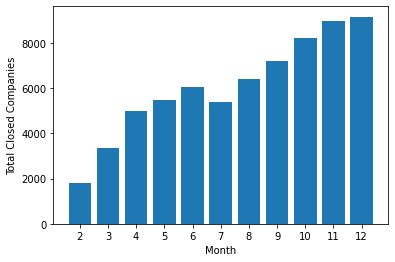

In [63]:
change = mca2020['totalClosed'].apply(lambda x: x - janData['totalClosed'][0])
plt.bar(mca2020['month'],change)
plt.xticks(mca2020['month'])
plt.xlabel('Month')
plt.ylabel('Total Closed Companies')
plt.show()